# [Generation Detection Dataset]

Exploration of DS generated by joseph

# Setup

## Library import
We import all the required Python libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os,sys
import joblib
from os import path

# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Common things
# from sklearn.metrics import classification_report
# from scipy import stats

# Visualizations
# import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("white") # darkgrid, whitegrid, dark, white, and ticks
# plt.figure(figsize=(7, 7))

# Autoreload extension
# if 'autoreload' not in get_ipython().extension_manager.loaded:
#     %load_ext autoreload
    
# %autoreload 2

In [3]:
# Examples seaborn
# with sns.axes_style("whitegrid"):
#     fig, axis = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
#     fig.suptitle(f'Position distribution on splits')
#     sns.boxplot(ax=axis[0], data=df_prep, y='event', x='ith_pos', order=event_label_map.values())
#     sns.boxplot(ax=axis[1], data=pd.read_pickle(path.join(DATA_PATH, "stage2_test.pkl") ), y='event', x='ith_pos', order=event_label_map.values())

## Local library import
We import all the required local libraries libraries

In [4]:
# Include local library paths
import sys
# sys.path.append('path/to/local/lib') # uncomment and fill to import local libraries
# add project folders so local libraries can be imported
sys.path.insert(1, os.path.join(os.getcwd()  , '..'))
sys.path.insert(1, os.path.join(os.getcwd()  , '../src'))

# Import local libraries
# from plibs.utils import corrstats
# from src.plibs.utils import plots as myplots

In [5]:
# notebook misc functions
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def displayAll(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):	
        display(df)  

In [6]:
def normalize(df, cols, normtype="minmax"):
    # copy the data
    df_min_max_scaled = df.copy()
    
    # apply normalization techniques
    for column in cols: # df_min_max_scaled.columns:
        if normtype=='minmax':
            df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
        elif normtype=='max':
            df_min_max_scaled[column] = (df_min_max_scaled[column] ) / (df_min_max_scaled[column].abs().max())    
        elif normtype=="zscale":
                df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].mean()) / df_min_max_scaled[column].std()   
    
    # view normalized data
    return df_min_max_scaled

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.

In [7]:
!(printenv | grep WANDB)

WANDB_API_KEY=2b27f846753e573f467fb3e8cf43744e4fd5c6d6
WANDB_DIR=.wandb
WANDB_PROJECT=dag-mtsm-wp2
WANDB_ENTITY=idsia-nlp


In [8]:
import os
env = os.getenv
WANDB_ENTITY=env("WANDB_ENTITY", None)
WANDB_PROJECT=env("WANDB_PROJECT", None)
print(WANDB_PROJECT)

dag-mtsm-wp2



# Data import
We retrieve all the required data for the analysis.

In [9]:
import wandb

In [22]:
api = wandb.Api()
artifact = api.artifact(f"{WANDB_ENTITY}/{WANDB_PROJECT}/ds_detection:latest")
rs_path = artifact.download()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb:   1 of 1 files downloaded.  
wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


In [23]:
rs_path

'/home/owlmx/idsia/misinfodag/notebooks/artifacts/ds_detection:v0'

In [41]:
artifact.files(names=["xx"])#[0].name

<ArtifactFiles idsia-nlp/dag-mtsm-wp2/ds_detection:latest (1)>

In [26]:
for f in artifact.files():
    print(f.name)

# rs = artifact.get("dataset.tsv")
rs = artifact["dataset.tsv"]

rs

dataset.tsv


In [10]:
import yaml

In [11]:
os.getcwd()

'/home/owlmx/idsia/misinfodag/notebooks'

In [52]:
with open("../pipeline_config.yaml", "r") as f:
    pipeline_config = yaml.load(f, Loader=yaml.FullLoader)
pipeline_config

{'steps': {'writters_attitude': {'models': [{'model': 'kinit/semeval2023-task3-persuasion-techniques',
     'name': 'persuation',
     'max_len': 350},
    {'model': 'SamLowe/roberta-base-go_emotions',
     'name': 'emotion',
     'max_len': 350},
    {'model': 'cardiffnlp/twitter-roberta-base-irony',
     'name': 'irony',
     'max_len': 350},
    {'model': 'jakub014/bert-base-uncased-IBM-argQ-30k-finetuned-convincingness-IBM',
     'name': 'convincingness',
     'max_len': 350,
     'label_map': {'LABEL_0': 'convincing', 'LABEL_1': 'non_convincing'}}]}}}

In [53]:
type(pipeline_config)
config_step = pipeline_config.get("steps").get("writters_attitude")
config_step

{'models': [{'model': 'kinit/semeval2023-task3-persuasion-techniques',
   'name': 'persuation',
   'max_len': 350},
  {'model': 'SamLowe/roberta-base-go_emotions',
   'name': 'emotion',
   'max_len': 350},
  {'model': 'cardiffnlp/twitter-roberta-base-irony',
   'name': 'irony',
   'max_len': 350},
  {'model': 'jakub014/bert-base-uncased-IBM-argQ-30k-finetuned-convincingness-IBM',
   'name': 'convincingness',
   'max_len': 350,
   'label_map': {'LABEL_0': 'convincing', 'LABEL_1': 'non_convincing'}}]}

In [58]:
config_step["models"][3].get('label_map', None)

{'LABEL_0': 'convincing', 'LABEL_1': 'non_convincing'}

In [78]:
for mmodel in config_step.get("models"):
    print(f"--->{mmodel['name']}")

--->persuation
--->emotion
--->irony
--->convincingness


In [82]:
d1 = {"a": 1, "b":2}
d2 = {"b": 3, "c":4}

{**d1, **d2}

{'a': 1, 'b': 3, 'c': 4}

In [45]:
# df = pd.read_csv("../out/emotions_softmax.tsv", sep='\t')
df = pd.read_csv("../out/convincing_softmax.tsv", sep='\t')

print(df.shape)

df.head()

(800, 3)


,Unnamed: 0,0,1
0,0,"{'label': 'LABEL_0', 'score': 0.8575644493103027}","{'label': 'LABEL_1', 'score': 0.14243553578853..."
1,1,"{'label': 'LABEL_0', 'score': 0.990467369556427}","{'label': 'LABEL_1', 'score': 0.00953260995447..."
2,2,"{'label': 'LABEL_0', 'score': 0.9453791379928589}","{'label': 'LABEL_1', 'score': 0.05462082847952..."
3,3,"{'label': 'LABEL_0', 'score': 0.8375083208084106}","{'label': 'LABEL_1', 'score': 0.16249169409275..."
4,4,"{'label': 'LABEL_0', 'score': 0.9846920371055603}","{'label': 'LABEL_1', 'score': 0.01530797779560..."


In [49]:
from src.utils import df_map_softmax_to_columns

In [60]:
rs_dss = [
    df_map_softmax_to_columns(pd.read_csv("../out/convincing_softmax.tsv", sep='\t'), 
                          prefix="convincingness_", label_map={'LABEL_0': 'convincing', 'LABEL_1': 'non_convincing'}),
    df_map_softmax_to_columns(pd.read_csv("../out/irony_softmax.tsv", sep='\t'), 
                          prefix="irony_", label_map=None)
]
rs_dss

[     convincingness_convincing  convincingness_non_convincing
 0                     0.857564                       0.142436
 1                     0.990467                       0.009533
 2                     0.945379                       0.054621
 3                     0.837508                       0.162492
 4                     0.984692                       0.015308
 ..                         ...                            ...
 795                   0.343012                       0.656988
 796                   0.936493                       0.063507
 797                   0.991282                       0.008718
 798                   0.988152                       0.011848
 799                   0.967368                       0.032632
 
 [800 rows x 2 columns],
      irony_non_irony  irony_irony
 0           0.970296     0.029704
 1           0.692633     0.307367
 2           0.978583     0.021417
 3           0.954622     0.045378
 4           0.362594     0.637405
 ..    

In [61]:
pd.concat(rs_dss, axis=1)

,convincingness_convincing,convincingness_non_convincing,irony_non_irony,irony_irony
0,0.857564,0.142436,0.970296,0.029704
1,0.990467,0.009533,0.692633,0.307367
2,0.945379,0.054621,0.978583,0.021417
3,0.837508,0.162492,0.954622,0.045378
4,0.984692,0.015308,0.362594,0.637405
...,...,...,...,...
795,0.343012,0.656988,0.491816,0.508184
796,0.936493,0.063507,0.877132,0.122868
797,0.991282,0.008718,0.764985,0.235015
798,0.988152,0.011848,0.969893,0.030107


In [46]:
def map_softmax_to_columns(df, label_map=None, prefix=None):
    # df = pd.read_csv("../out/emotions_softmax.tsv", sep="\t")
    _labels = ( [ ast.literal_eval(v)['label'] for v  in df.iloc[0,:].values if type(v)==str ])
    print(_labels)
    df = df.iloc[:,1:].rename(lambda n: f"{_labels[int(n)]}", axis="columns")
    df = df.applymap(lambda e: ast.literal_eval(e)['score'])
    if label_map:
        df.rename(columns=label_map, inplace=True)
    if prefix:
        df.rename(columns={c: f"{prefix}{c}" for c in df.columns}, inplace=True)
        
    return df

map_softmax_to_columns(df, prefix="convincingness_", label_map={'LABEL_0': 'convincing', 'LABEL_1': 'non_convincing'})
# map_softmax_to_columns(df, prefix="emotion_")

['LABEL_0', 'LABEL_1']


,convincingness_convincing,convincingness_non_convincing
0,0.857564,0.142436
1,0.990467,0.009533
2,0.945379,0.054621
3,0.837508,0.162492
4,0.984692,0.015308
...,...,...
795,0.343012,0.656988
796,0.936493,0.063507
797,0.991282,0.008718
798,0.988152,0.011848


In [35]:
[f"prefix_{c}" for c in df.columns]

['prefix_Unnamed: 0',
 'prefix_0',
 'prefix_1',
 'prefix_2',
 'prefix_3',
 'prefix_4',
 'prefix_5',
 'prefix_6',
 'prefix_7',
 'prefix_8',
 'prefix_9',
 'prefix_10',
 'prefix_11',
 'prefix_12',
 'prefix_13',
 'prefix_14',
 'prefix_15',
 'prefix_16',
 'prefix_17',
 'prefix_18',
 'prefix_19',
 'prefix_20',
 'prefix_21',
 'prefix_22',
 'prefix_23',
 'prefix_24',
 'prefix_25',
 'prefix_26',
 'prefix_27']

In [10]:

df[["instruction", "context", "category", "model", "response"]].to_csv("20230808_092322_databricks-dolly_size-200_source.tsv", sep="\t")

In [12]:
dftmp  = pd.read_csv("20230808_092322_databricks-dolly_size-200_source.tsv", sep="\t")
dftmp 

,Unnamed: 0,instruction,context,category,model,response
0,0,What are the best selling albums of all time? ...,NaN,brainstorming,human,Best selling albums of all time:\n\n- Michael ...
1,1,"Given this paragraph about magnesium, what is ...",Elemental magnesium is a gray-white lightweigh...,closed_qa,human,The melting point of magnesium is 650 °C.
2,2,How do I pick the best bananas?,NaN,general_qa,human,It depends on when you want to eat them. If yo...
3,3,Extract the teams that Bob Sanders played thro...,"Demond ""Bob"" Sanders (born February 24, 1981) ...",information_extraction,human,"Iowa Hawkeyes, Indianapolis Colts, San Diego C..."
4,4,Who was the 27th president of the United State...,NaN,open_qa,human,William Howard Taft was the 27th president of ...
...,...,...,...,...,...,...
795,795,How many cats did Freddie Mercury have?,NaN,open_qa,huggyllama/llama-7b,"Freddie Mercury, the legendary singer of the r..."
796,796,What coloring of cat is usually almost always ...,NaN,open_qa,huggyllama/llama-7b,The coloring of cats that is usually almost al...
797,797,"What is Cisco's formal company name, where is ...","Cisco Systems, Inc., commonly known as Cisco, ...",closed_qa,huggyllama/llama-7b,"Cisco's formal company name is Cisco Systems, ..."
798,798,How many days is enough to vacation in Belgium?,NaN,brainstorming,huggyllama/llama-7b,The length of time you need to spend on vacati...


In [15]:
dftmp.model.unique()

array(['human', 'meta-llama/Llama-2-7b-chat-hf',
       'tiiuae/falcon-7b-instruct', 'huggyllama/llama-7b'], dtype=object)

In [33]:
for idx, e in dftmp.iloc[:3,:].iterrows():
    print(e)

Unnamed: 0                                                     0
instruction    What are the best selling albums of all time? ...
context                                                      NaN
category                                           brainstorming
model                                                      human
response       Best selling albums of all time:\n\n- Michael ...
Name: 0, dtype: object
Unnamed: 0                                                     1
instruction    Given this paragraph about magnesium, what is ...
context        Elemental magnesium is a gray-white lightweigh...
category                                               closed_qa
model                                                      human
response               The melting point of magnesium is 650 °C.
Name: 1, dtype: object
Unnamed: 0                                                     2
instruction                      How do I pick the best bananas?
context                                     

In [36]:
def data():
    for idx, e in dftmp.iloc[:5,:].iterrows():
        yield e

    # iter = dftmp.iterrows()
    # while iter:
    #     yield next(iter)

 
#    for r in dftmp.itertuples():
#      yield r

In [ ]:
pd.DataFrame

In [39]:
for e in data():
    print(e)

Unnamed: 0                                                     0
instruction    What are the best selling albums of all time? ...
context                                                      NaN
category                                           brainstorming
model                                                      human
response       Best selling albums of all time:\n\n- Michael ...
Name: 0, dtype: object
Unnamed: 0                                                     1
instruction    Given this paragraph about magnesium, what is ...
context        Elemental magnesium is a gray-white lightweigh...
category                                               closed_qa
model                                                      human
response               The melting point of magnesium is 650 °C.
Name: 1, dtype: object
Unnamed: 0                                                     2
instruction                      How do I pick the best bananas?
context                                     

In [15]:
dftmp = pd.read_csv("../data/data/detection_dataset/20230808_092322_databricks-dolly_size-200_melted_with_id_with_radar_scores (1).csv")

print(dftmp.shape)

dftmp.iloc[:,-3:]

(800, 8)


,id,radar_dolly-v1-6b_score,vicuna-7b_score
0,c3802a5482164a0db7b3b3b5dd6c9703,0.4000,0.6254
1,a362b09b6f7a440d8f91c60b720b9821,0.9815,0.9977
2,86c6d543b0c542e1a9f871d5ed5bff3c,0.9082,0.9946
3,957de32950494b708f24b08fc99174d1,0.9938,0.9992
4,6fe1c21ba7084672ae4fe79e04adc371,0.9658,0.9985
...,...,...,...
795,d44efc80533d44c2b5ccb3c67c10b4ed,0.7477,0.9916
796,dcf439e917df457b9a4bc9c0c458f6a3,0.7678,0.9447
797,9e7c99a45d6245f1a9e54b19a67f0397,0.9883,0.9992
798,61bcec6f378f4182b193db8f262c4dbf,0.5116,0.9933


Merging

In [18]:
df = pd.concat([df, dftmp.iloc[:,-4:]], axis=1)
print(df.shape)
df.head()

(800, 30)


,instruction,context,category,model,response,readability_flesch_kincaid_score,readability_flesch_score,readability_gunning_fog_score,readability_coleman_liau_score,readability_dale_chall_score,readability_ari_score,readability_linsear_write_score,stats_avg_word_length,stats_avg_sentence_length,stats_avg_words_per_sentence,stats_percent_vowels,stats_percent_consonants,stats_percent_punctuation,stats_percent_stopwords,stats_num_words,stats_num_sentences,stats_percent_unique_words,stats_percent_long_words,spacy_percent_nouns,spacy_percent_verbs,spacy_percent_adjectives,response,id,radar_dolly-v1-6b_score,vicuna-7b_score
0,What are the best selling albums of all time? ...,NaN,brainstorming,human,Best selling albums of all time:\n\n- Michael ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.534483,378.0,58.0,0.267196,0.338624,0.068783,0.103448,58.0,1.0,0.896552,0.206897,0.043011,0.021505,0.032258,Best selling albums of all time:\n\n- Michael ...,c3802a5482164a0db7b3b3b5dd6c9703,0.4000,0.6254
1,"Given this paragraph about magnesium, what is ...",Elemental magnesium is a gray-white lightweigh...,closed_qa,human,The melting point of magnesium is 650 °C.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.250000,20.0,4.5,0.268293,0.390244,0.024390,0.250000,8.0,2.0,1.000000,0.125000,0.400000,0.000000,0.000000,The melting point of magnesium is 650 °C.,a362b09b6f7a440d8f91c60b720b9821,0.9815,0.9977
2,How do I pick the best bananas?,NaN,general_qa,human,It depends on when you want to eat them. If yo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.875000,53.6,12.0,0.305147,0.448529,0.025735,0.464286,56.0,5.0,0.714286,0.053571,0.095238,0.142857,0.095238,It depends on when you want to eat them. If yo...,86c6d543b0c542e1a9f871d5ed5bff3c,0.9082,0.9946
3,Extract the teams that Bob Sanders played thro...,"Demond ""Bob"" Sanders (born February 24, 1981) ...",information_extraction,human,"Iowa Hawkeyes, Indianapolis Colts, San Diego C...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.714286,53.0,7.0,0.320755,0.396226,0.037736,0.000000,7.0,1.0,1.000000,0.428571,0.000000,0.000000,0.000000,"Iowa Hawkeyes, Indianapolis Colts, San Diego C...",957de32950494b708f24b08fc99174d1,0.9938,0.9992
4,Who was the 27th president of the United State...,NaN,open_qa,human,William Howard Taft was the 27th president of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.533333,40.5,8.0,0.231707,0.402439,0.012195,0.400000,15.0,2.0,0.933333,0.066667,0.062500,0.000000,0.062500,William Howard Taft was the 27th president of ...,6fe1c21ba7084672ae4fe79e04adc371,0.9658,0.9985


Verify differences

In [25]:
sum(df.iloc[:,4] != df.iloc[:,-4])

df[df.iloc[:,4] != df.iloc[:,-4]]

,instruction,context,category,model,response,readability_flesch_kincaid_score,readability_flesch_score,readability_gunning_fog_score,readability_coleman_liau_score,readability_dale_chall_score,readability_ari_score,readability_linsear_write_score,stats_avg_word_length,stats_avg_sentence_length,stats_avg_words_per_sentence,stats_percent_vowels,stats_percent_consonants,stats_percent_punctuation,stats_percent_stopwords,stats_num_words,stats_num_sentences,stats_percent_unique_words,stats_percent_long_words,spacy_percent_nouns,spacy_percent_verbs,spacy_percent_adjectives,response,id,radar_dolly-v1-6b_score,vicuna-7b_score
335,What therapies are available for Autism?,Autism therapies include a wide variety of the...,closed_qa,meta-llama/Llama-2-7b-chat-hf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fa9650d151ae4553a55ed07be350286a,NaN,NaN
488,Who is country singer Jordan Davis,"Jordan Carl Wheeler Davis (born March 30, 1988...",information_extraction,tiiuae/falcon-7b-instruct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cf10413bc6ac417cbf4b8d34cd54ae55,NaN,NaN
490,Retrieve and list the Sum41 albums mentioned i...,"Sum 41 is a Canadian rock band from Ajax, Onta...",information_extraction,tiiuae/falcon-7b-instruct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8ca0978efc5f4aab869ef0ec9083ecb5,NaN,NaN


# Data processing
Put here the core of the notebook. Feel free to further split this section into subsections.

Compute models differences because, according to RADAR, the stepest the difference means the most probable the text comes from an LLMs

In [30]:
df.columns

Index(['instruction', 'context', 'category', 'model', 'response',
       'readability_flesch_kincaid_score', 'readability_flesch_score',
       'readability_gunning_fog_score', 'readability_coleman_liau_score',
       'readability_dale_chall_score', 'readability_ari_score',
       'readability_linsear_write_score', 'stats_avg_word_length',
       'stats_avg_sentence_length', 'stats_avg_words_per_sentence',
       'stats_percent_vowels', 'stats_percent_consonants',
       'stats_percent_punctuation', 'stats_percent_stopwords',
       'stats_num_words', 'stats_num_sentences', 'stats_percent_unique_words',
       'stats_percent_long_words', 'spacy_percent_nouns',
       'spacy_percent_verbs', 'spacy_percent_adjectives', 'response', 'id',
       'radar_dolly-v1-6b_score', 'vicuna-7b_score', 'rada_models_diff'],
      dtype='object')

In [27]:
df["rada_models_diff"] = abs(df['radar_dolly-v1-6b_score'] - df['vicuna-7b_score'])

In [79]:
# df.groupby(by=["model"]).agg('sum').unstack().plot(kind="barh") #.rada_models_diff
dftmp = df.groupby(by=["model"]).agg('mean').reset_index()
dftmp.head()

,model,readability_flesch_kincaid_score,readability_flesch_score,readability_gunning_fog_score,readability_coleman_liau_score,readability_dale_chall_score,readability_ari_score,readability_linsear_write_score,stats_avg_word_length,stats_avg_sentence_length,stats_avg_words_per_sentence,stats_percent_vowels,stats_percent_consonants,stats_percent_punctuation,stats_percent_stopwords,stats_num_words,stats_num_sentences,stats_percent_unique_words,stats_percent_long_words,spacy_percent_nouns,spacy_percent_verbs,spacy_percent_adjectives,radar_dolly-v1-6b_score,vicuna-7b_score,rada_models_diff
0,huggyllama/llama-7b,10.376945,55.022808,12.765775,9.255059,9.305133,10.349612,12.770912,4.828651,91.908849,17.508791,0.285243,0.435912,0.032959,0.370999,166.800000,12.965000,0.593639,0.195093,0.182231,0.074859,0.063028,0.769665,0.911387,0.157415
1,human,13.049572,44.917890,15.692804,11.565502,9.703469,14.291281,16.807649,5.524344,72.537695,12.288512,0.291687,0.442961,0.031863,0.285848,55.650000,4.110000,0.858968,0.208049,0.173319,0.072726,0.061397,0.827648,0.905475,0.091699
2,meta-llama/Llama-2-7b-chat-hf,9.451418,53.816677,11.219079,10.448680,9.814233,9.044537,10.012513,4.048598,105.747255,25.509629,0.274165,0.418366,0.032293,0.245246,255.844221,10.010050,0.547796,0.157934,0.170831,0.089706,0.065620,0.890704,0.968981,0.086400
3,tiiuae/falcon-7b-instruct,14.049611,41.448370,16.451833,11.307421,10.403286,15.349170,18.679620,4.504344,93.890753,19.801907,0.280779,0.422822,0.037640,0.253341,88.308081,5.085859,0.673756,0.190542,0.184540,0.073046,0.069783,0.957975,0.979016,0.027947


In [112]:
humanvals = dftmp.query("model == 'human'").values.squeeze()
humanvals

array(['human', 13.049572231762557, 44.91788991499024, 15.692803681683241,
       11.565502426687232, 9.70346876945347, 14.291281492304934,
       16.80764945524561, 5.5243442356306955, 72.5376952784058,
       12.288512392578182, 0.29168717635097774, 0.4429612537877226,
       0.03186317933691399, 0.28584808902716996, 55.65, 4.11,
       0.8589678995812687, 0.20804883296879345, 0.1733187612099244,
       0.07272635615807115, 0.06139708849839129, 0.8276481481481481,
       0.9054751322751323, 0.0916989417989418], dtype=object)

normalize aorund human values (0.0)

In [143]:
# around human values
dftmp2 = pd.concat([dftmp.iloc[:,0], dftmp.apply(lambda row: row[1:] - humanvals[1:], axis=1)], axis=1)
dftmp2

,model,readability_flesch_kincaid_score,readability_flesch_score,readability_gunning_fog_score,readability_coleman_liau_score,readability_dale_chall_score,readability_ari_score,readability_linsear_write_score,stats_avg_word_length,stats_avg_sentence_length,stats_avg_words_per_sentence,stats_percent_vowels,stats_percent_consonants,stats_percent_punctuation,stats_percent_stopwords,stats_num_words,stats_num_sentences,stats_percent_unique_words,stats_percent_long_words,spacy_percent_nouns,spacy_percent_verbs,spacy_percent_adjectives,radar_dolly-v1-6b_score,vicuna-7b_score,rada_models_diff
0,huggyllama/llama-7b,-2.672627,10.104918,-2.927029,-2.310444,-0.398335,-3.941670,-4.036737,-0.695693,19.371154,5.220278,-0.006445,-0.007050,0.001096,0.085151,111.150000,8.855000,-0.265329,-0.012956,0.008913,0.002133,0.001631,-0.057984,0.005912,0.065716
1,human,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,meta-llama/Llama-2-7b-chat-hf,-3.598154,8.898787,-4.473725,-1.116822,0.110764,-5.246745,-6.795136,-1.475746,33.209559,13.221116,-0.017522,-0.024595,0.000430,-0.040602,200.194221,5.900050,-0.311172,-0.050115,-0.002488,0.016979,0.004222,0.063056,0.063506,-0.005299
3,tiiuae/falcon-7b-instruct,1.000039,-3.469520,0.759030,-0.258082,0.699817,1.057889,1.871971,-1.020000,21.353058,7.513394,-0.010908,-0.020139,0.005777,-0.032507,32.658081,0.975859,-0.185212,-0.017507,0.011221,0.000320,0.008386,0.130327,0.073541,-0.063752


min_max normalization by columns

In [144]:
# dftmp2 = normalize_minmax(dftmp2.query("model != 'human'"), cols=dftmp.columns[1:]).melt(id_vars=["model"])
# dftmp2 = dftmp2.query("model != 'human'").melt(id_vars=["model"])
dftmp2 = normalize(dftmp2.query("model != 'human'"), cols=dftmp.columns[1:], normtype="max").melt(id_vars=["model"])
dftmp2 = normalize(dftmp2.query("model != 'human'"), cols=dftmp.columns[1:], normtype="zscale").melt(id_vars=["model"]) # # stds around mean

dftmp2

,model,variable,value
0,huggyllama/llama-7b,readability_flesch_kincaid_score,-0.376523
1,meta-llama/Llama-2-7b-chat-hf,readability_flesch_kincaid_score,-0.757081
2,tiiuae/falcon-7b-instruct,readability_flesch_kincaid_score,1.133604
3,huggyllama/llama-7b,readability_flesch_score,0.655754
4,meta-llama/Llama-2-7b-chat-hf,readability_flesch_score,0.495221
...,...,...,...
67,meta-llama/Llama-2-7b-chat-hf,vicuna-7b_score,0.434386
68,tiiuae/falcon-7b-instruct,vicuna-7b_score,0.709350
69,huggyllama/llama-7b,rada_models_diff,1.030726
70,meta-llama/Llama-2-7b-chat-hf,rada_models_diff,-0.064583


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'readability_flesch_kincaid_score'),
  Text(1, 0, 'readability_flesch_score'),
  Text(2, 0, 'readability_gunning_fog_score'),
  Text(3, 0, 'readability_coleman_liau_score'),
  Text(4, 0, 'readability_dale_chall_score'),
  Text(5, 0, 'readability_ari_score'),
  Text(6, 0, 'readability_linsear_write_score'),
  Text(7, 0, 'stats_avg_word_length'),
  Text(8, 0, 'stats_avg_sentence_length'),
  Text(9, 0, 'stats_avg_words_per_sentence'),
  Text(10, 0, 'stats_percent_vowels'),
  Text(11, 0, 'stats_percent_consonants'),
  Text(12, 0, 'stats_percent_punctuation'),
  Text(13, 0, 'stats_percent_stopwords'),
  Text(14, 0, 'stats_num_words'),
  Text(15, 0, 'stats_num_sentences'),
  Text(16, 0, 'stats_percent_unique_words'),
  Text(17, 0, 'stats_percent_long_words'),
  Text(18, 0, 'spacy_percent_nouns'),
  Text(19, 0, 'spacy_percent_verbs'),
  Text(20, 0, 'spacy_percent_adje

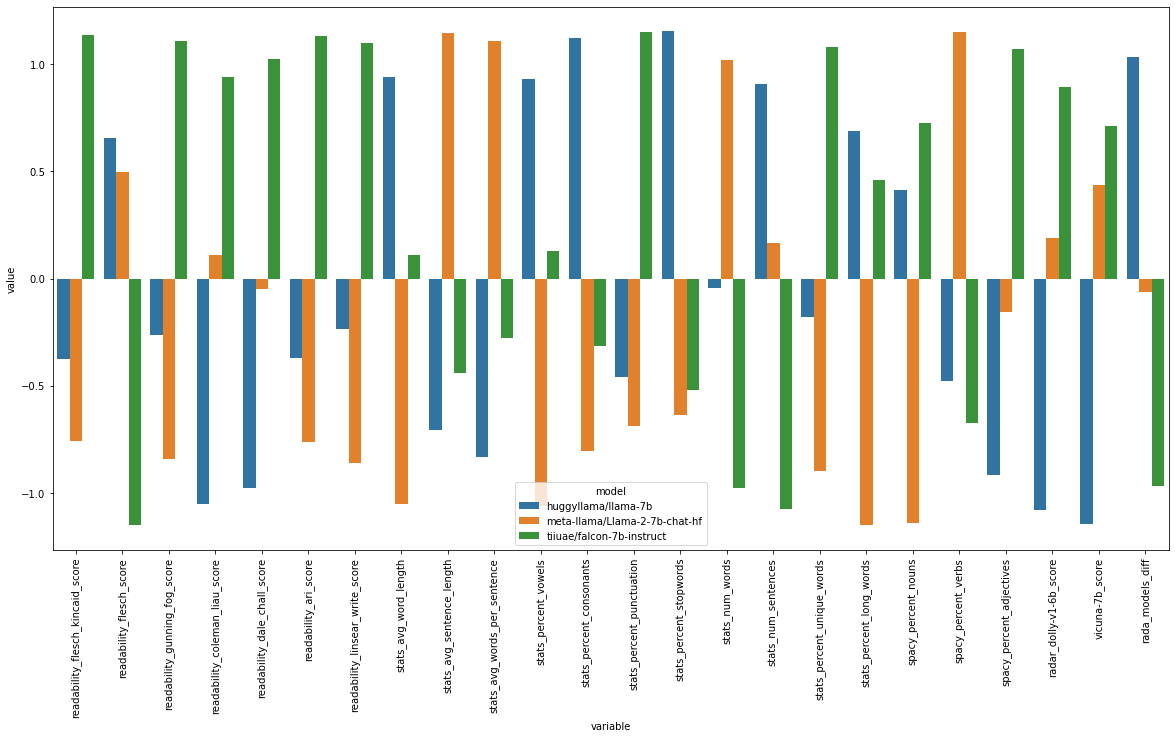

In [145]:
plt.figure(figsize=(20, 10))
sns.barplot(data = dftmp2, x="variable", y="value", hue="model")
plt.xticks(rotation=90)

## How accurate is RADAR

In [148]:
df.head()

,instruction,context,category,model,response,readability_flesch_kincaid_score,readability_flesch_score,readability_gunning_fog_score,readability_coleman_liau_score,readability_dale_chall_score,readability_ari_score,readability_linsear_write_score,stats_avg_word_length,stats_avg_sentence_length,stats_avg_words_per_sentence,stats_percent_vowels,stats_percent_consonants,stats_percent_punctuation,stats_percent_stopwords,stats_num_words,stats_num_sentences,stats_percent_unique_words,stats_percent_long_words,spacy_percent_nouns,spacy_percent_verbs,spacy_percent_adjectives,response,id,radar_dolly-v1-6b_score,vicuna-7b_score,rada_models_diff
0,What are the best selling albums of all time? ...,NaN,brainstorming,human,Best selling albums of all time:\n\n- Michael ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.534483,378.0,58.0,0.267196,0.338624,0.068783,0.103448,58.0,1.0,0.896552,0.206897,0.043011,0.021505,0.032258,Best selling albums of all time:\n\n- Michael ...,c3802a5482164a0db7b3b3b5dd6c9703,0.4000,0.6254,0.2254
1,"Given this paragraph about magnesium, what is ...",Elemental magnesium is a gray-white lightweigh...,closed_qa,human,The melting point of magnesium is 650 °C.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.250000,20.0,4.5,0.268293,0.390244,0.024390,0.250000,8.0,2.0,1.000000,0.125000,0.400000,0.000000,0.000000,The melting point of magnesium is 650 °C.,a362b09b6f7a440d8f91c60b720b9821,0.9815,0.9977,0.0162
2,How do I pick the best bananas?,NaN,general_qa,human,It depends on when you want to eat them. If yo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.875000,53.6,12.0,0.305147,0.448529,0.025735,0.464286,56.0,5.0,0.714286,0.053571,0.095238,0.142857,0.095238,It depends on when you want to eat them. If yo...,86c6d543b0c542e1a9f871d5ed5bff3c,0.9082,0.9946,0.0864
3,Extract the teams that Bob Sanders played thro...,"Demond ""Bob"" Sanders (born February 24, 1981) ...",information_extraction,human,"Iowa Hawkeyes, Indianapolis Colts, San Diego C...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.714286,53.0,7.0,0.320755,0.396226,0.037736,0.000000,7.0,1.0,1.000000,0.428571,0.000000,0.000000,0.000000,"Iowa Hawkeyes, Indianapolis Colts, San Diego C...",957de32950494b708f24b08fc99174d1,0.9938,0.9992,0.0054
4,Who was the 27th president of the United State...,NaN,open_qa,human,William Howard Taft was the 27th president of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.533333,40.5,8.0,0.231707,0.402439,0.012195,0.400000,15.0,2.0,0.933333,0.066667,0.062500,0.000000,0.062500,William Howard Taft was the 27th president of ...,6fe1c21ba7084672ae4fe79e04adc371,0.9658,0.9985,0.0327


In [152]:
df.columns

Index(['instruction', 'context', 'category', 'model', 'response',
       'readability_flesch_kincaid_score', 'readability_flesch_score',
       'readability_gunning_fog_score', 'readability_coleman_liau_score',
       'readability_dale_chall_score', 'readability_ari_score',
       'readability_linsear_write_score', 'stats_avg_word_length',
       'stats_avg_sentence_length', 'stats_avg_words_per_sentence',
       'stats_percent_vowels', 'stats_percent_consonants',
       'stats_percent_punctuation', 'stats_percent_stopwords',
       'stats_num_words', 'stats_num_sentences', 'stats_percent_unique_words',
       'stats_percent_long_words', 'spacy_percent_nouns',
       'spacy_percent_verbs', 'spacy_percent_adjectives', 'response', 'id',
       'radar_dolly-v1-6b_score', 'vicuna-7b_score', 'rada_models_diff'],
      dtype='object')

(array([0, 1, 2]),
 [Text(0, 0, 'radar_dolly-v1-6b_score'),
  Text(1, 0, 'vicuna-7b_score'),
  Text(2, 0, 'rada_models_diff')])

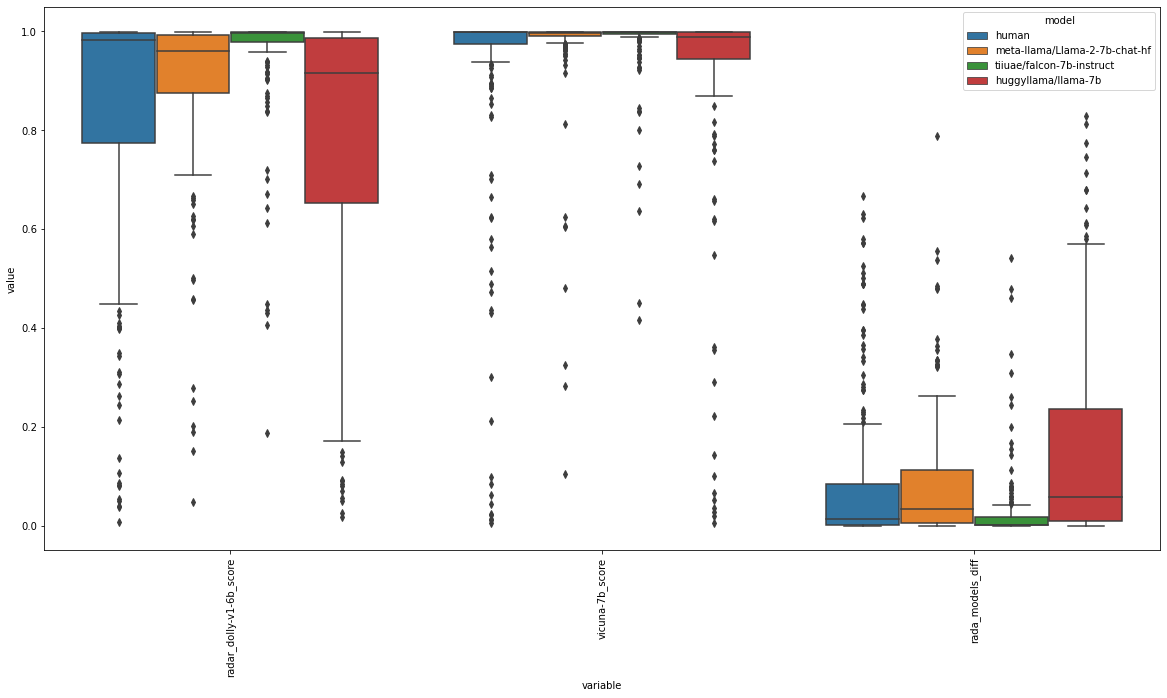

In [172]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[["model", *df.columns[-3:]]].melt(id_vars=["model"]), x="variable", y="value", hue="model")
plt.xticks(rotation=90)

In [173]:
dftmp = df[["model", *df.columns[-3:]]]
dftmp

,model,radar_dolly-v1-6b_score,vicuna-7b_score,rada_models_diff
0,human,0.4000,0.6254,0.2254
1,human,0.9815,0.9977,0.0162
2,human,0.9082,0.9946,0.0864
3,human,0.9938,0.9992,0.0054
4,human,0.9658,0.9985,0.0327
...,...,...,...,...
795,huggyllama/llama-7b,0.7477,0.9916,0.2439
796,huggyllama/llama-7b,0.7678,0.9447,0.1769
797,huggyllama/llama-7b,0.9883,0.9992,0.0109
798,huggyllama/llama-7b,0.5116,0.9933,0.4817


In [181]:
import numpy as np
from sklearn.dummy import DummyClassifier
for c in dftmp.columns[1:]:
    X = dftmp[c]
    y = dftmp.model.map(lambda v: True if v=="human" else False)
    dummy_clf = DummyClassifier(strategy="most_frequent")
    dummy_clf.fit(X, y)
    dummy_clf.predict(X)
    print(f"Column: {c} Score: {dummy_clf.score(X, y)}")

Column: radar_dolly-v1-6b_score Score: 0.75
Column: vicuna-7b_score Score: 0.75
Column: rada_models_diff Score: 0.75


In [228]:
import numpy as np
from sklearn.svm import SVC
for c in dftmp.columns[1:]:
    X = np.array(dftmp[c]).reshape(-1,1)
    y = dftmp.model.map(lambda v: True if v=="human" else False)
    iclf = SVC(kernel="linear")
    iclf = iclf.fit(X, y)
    iclf.predict(X)
    print(f"Column: {c} Score: {iclf.score(X, y)}")

X = np.array(dftmp.iloc[:,1:])
iclf = SVC(kernel="linear")
iclf = iclf.fit(X, y)
iclf.predict(X)
print(f"Ensamble Score: {iclf.score(X, y)}")


Column: radar_dolly-v1-6b_score Score: 0.749003984063745
Column: vicuna-7b_score Score: 0.749003984063745
Column: rada_models_diff Score: 0.749003984063745
Ensamble Score: 0.749003984063745


In [189]:
dftmp = dftmp.dropna()

In [214]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5)
X = dftmp.iloc[:,1:]
y = dftmp.model.map(lambda v: True if v=="human" else False)
# y = dftmp.model.map(lambda v: 1 if v=="human" else 0)
clf = clf.fit(X, y)
clf.predict(X)
print(f"Score: {clf.score(X, y)}")

Score: 0.7861885790172642


[Text(0.52, 0.9, 'vicuna-7b_score <= 0.912\ngini = 0.376\nsamples = 753\nvalue = [564, 189]\nclass = Generated'),
 Text(0.26, 0.7, 'vicuna-7b_score <= 0.882\ngini = 0.489\nsamples = 82\nvalue = [47, 35]\nclass = Generated'),
 Text(0.16, 0.5, 'rada_models_diff <= 0.111\ngini = 0.471\nsamples = 71\nvalue = [44, 27]\nclass = Generated'),
 Text(0.08, 0.3, 'radar_dolly-v1-6b_score <= 0.884\ngini = 0.495\nsamples = 29\nvalue = [13, 16]\nclass = Human'),
 Text(0.04, 0.1, '\n  (...)  \n'),
 Text(0.12, 0.1, '\n  (...)  \n'),
 Text(0.24, 0.3, 'radar_dolly-v1-6b_score <= 0.043\ngini = 0.387\nsamples = 42\nvalue = [31, 11]\nclass = Generated'),
 Text(0.2, 0.1, '\n  (...)  \n'),
 Text(0.28, 0.1, '\n  (...)  \n'),
 Text(0.36, 0.5, 'vicuna-7b_score <= 0.893\ngini = 0.397\nsamples = 11\nvalue = [3, 8]\nclass = Human'),
 Text(0.32, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Human'),
 Text(0.4, 0.3, 'vicuna-7b_score <= 0.896\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = Generated'),
 Tex

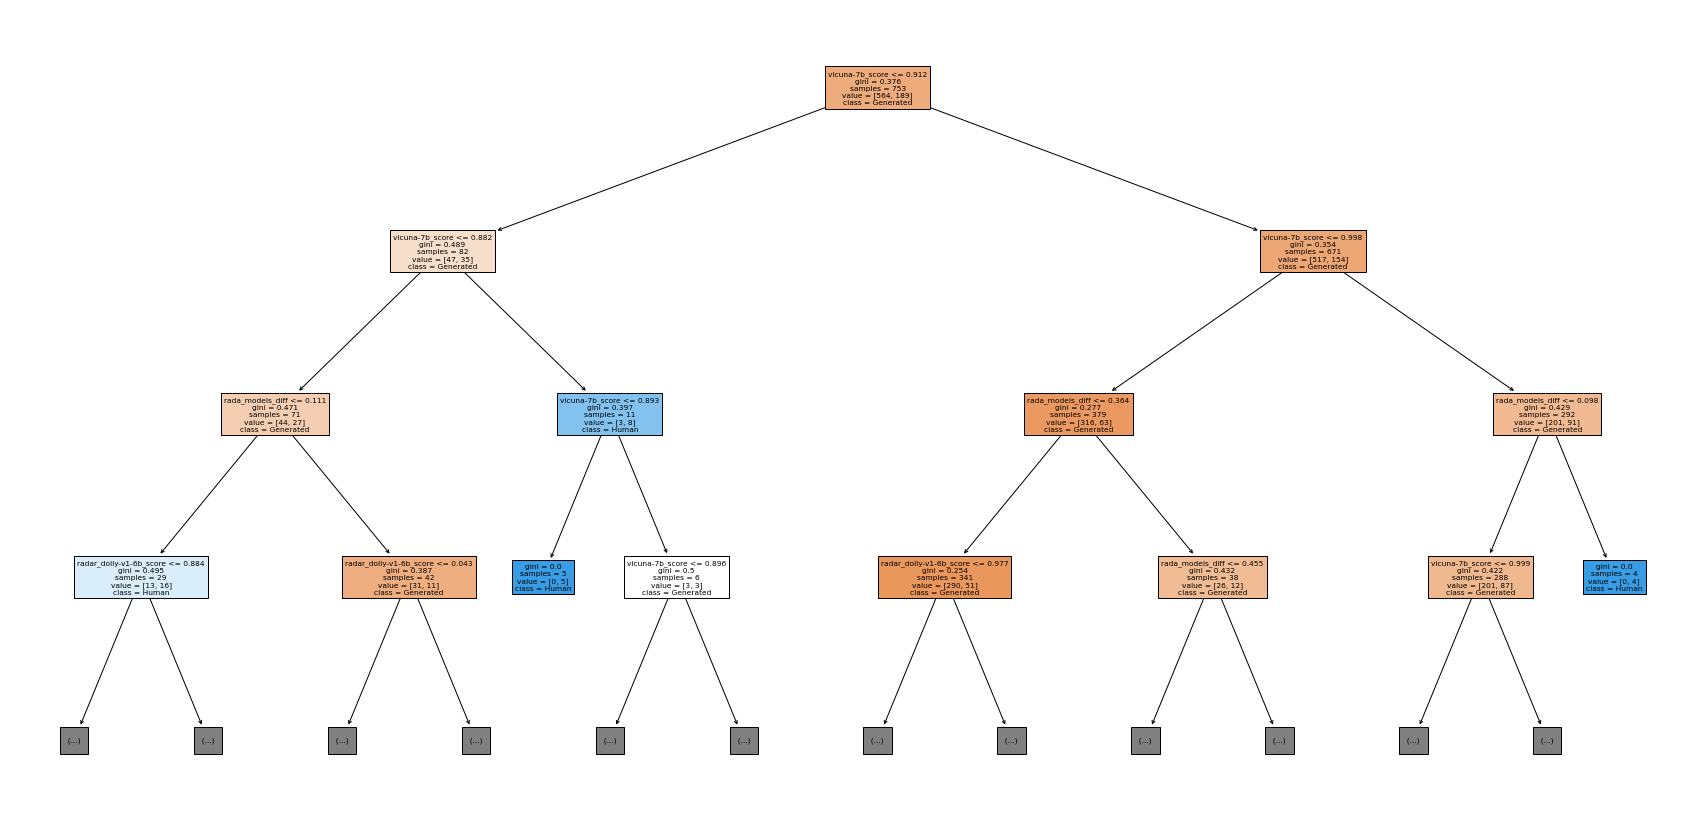

In [216]:
plt.figure(figsize=(30, 15))

tree.plot_tree(clf, feature_names=dftmp.columns[1:], class_names=["Generated", "Human"], max_depth=3, filled=True)

In [ ]:
dd